<a href="https://colab.research.google.com/github/Ssergeymiss/Med_Text_Cluster/blob/main/Med_text_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import nltk

In [ ]:
df=pd.read_csv("/content/Rinc.csv",on_bad_lines='skip')
df.head()

,Title,Lable
0,"Авдеева В.Г., Балахонцев А.П., Федоткин О.В. ...",2.0
1,"Авдеева В.Г., Балахонцев А.П., Федоткин О.В. П...",2.0
2,"Авитисов П.В., Гасанов Ш.М.Н. Анализ возможнос...",2.0
3,"агапитов а.а., бойков а.а. силы и средства слу...",2.0
4,"Антонюк Г.В., Кирсанов А.И., Дворский А.Г., Зо...",2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   3385 non-null   object 
 1   Lable   3379 non-null   float64
dtypes: float64(1), object(1)
memory usage: 53.0+ KB


In [ ]:
lemmatize = nltk.WordNetLemmatizer()

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
pdf=pd.DataFrame()

In [ ]:
clean_text=[]

In [ ]:
from nltk.corpus import stopwords

nltk.download("stopwords")

stopwords_ = set(stopwords.words("russian"))

for i in range(len(df["Title"])):

  sample_text = df["Title"][i]
  tokens = sample_text.split()
  clean_tokens = [t for t in tokens if not t in stopwords_]
  clean_tx = " ".join(clean_tokens)
  clean_text.append(clean_tx)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pdf["Title"]=clean_text

In [ ]:
pdf["Title"].head(10)

0    Авдеева В.Г., Балахонцев А.П., Федоткин О.В. П...
1    Авдеева В.Г., Балахонцев А.П., Федоткин О.В. П...
2    Авитисов П.В., Гасанов Ш.М.Н. Анализ возможнос...
3    агапитов а.а., бойков а.а. силы средства служб...
4    Антонюк Г.В., Кирсанов А.И., Дворский А.Г., Зо...
5    Астанкин С.В., Дворский А.Г., Золотарёва В.И.,...
6    Багдасаров Г.Г., Волошко В.М. Участие окружных...
7    Багненко С.Ф., Миннуллин И.П., Мирошниченко А....
8    Базанов С.В., Белоусов А.И. Создание становлен...
9    Базанов С.В., Шарабанова И.Ю., Потапенко Л.В. ...
Name: Title, dtype: object

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from string import punctuation
stopwords =stopwords.words("russian")


In [ ]:
def preprocess_text(text):
    
    text = text.lower()  # Lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r"https?://\S+", "", text)
    text=  re.sub(r"<a[^>]*>(.*?)</a>", r"\1", text)
    text=  re.sub(r"<p[^>]*>(.*?)</p>", r"\1", text)
    text = " ".join(text.split())
    text = re.sub(r"\b[0-9]+\b\s*", "", text)
    text =" ".join([w for w in text.split() if w.isalpha()])
    text = re.sub(r"[^A-Za-z0-9\s]+", "", text)
    text = nltk.word_tokenize(text,language = "russian")
    

    return text



In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 103.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=66d83aee0d976a06c8981255db92db50c38f0be506cbf008d18b36cf8db94090
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
from pymorphy2 import MorphAnalyzer

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"

morph = MorphAnalyzer()

def lemmatizer(doc):
    
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

In [ ]:
import re

In [ ]:
new_text=[]

In [ ]:
new_text = df["Title"].apply(lemmatizer)

In [ ]:
#new_text = pdf["Title"].apply(preprocess_text)

In [ ]:
df["Title"][1]

'Авдеева В.Г., Балахонцев А.П., Федоткин О.В. Перспективные направления деятельности службы медицины катастроф Пермского края // Медицина катастроф. 2006. №\xa01/2. С. 8–11. '

In [ ]:
n_text=[]

In [ ]:
n_text=' '.join(word for word in new_text.split() if len(word)>3)

AttributeError: ignored

In [ ]:
new_text[1]

['авдеев',
 'в',
 'г',
 'балахонцев',
 'а',
 'п',
 'федоткина',
 'о',
 'в',
 'перспективный',
 'направление',
 'деятельность',
 'служба',
 'медицина',
 'катастрофа',
 'пермский',
 'край',
 'медицина',
 'катастрофа',
 '№',
 'с',
 '–']

In [ ]:
clean = [x for x in new_text if x is not None]

In [ ]:
n_text=' '.join(word for word in clean.split() if len(word)>3)

AttributeError: ignored

In [ ]:
len(clean)

3201

In [ ]:
now_text=[]

In [ ]:
for i in clean:
  x=",".join(i)
  now_text.append(x)

In [ ]:
now_text[1]

'авдеев,в,г,балахонцев,а,п,федоткина,о,в,перспективный,направление,деятельность,служба,медицина,катастрофа,пермский,край,медицина,катастрофа,№,с,–'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)

matrix = tfidf_vectorizer.fit_transform(now_text)

In [ ]:
len(now_text)

3380

In [ ]:
matrix.shape

(3380, 8395)

In [ ]:
X=matrix.todense()

In [ ]:
X_wcss = np.asarray(X)

Text(0, 0.5, 'WCSS')

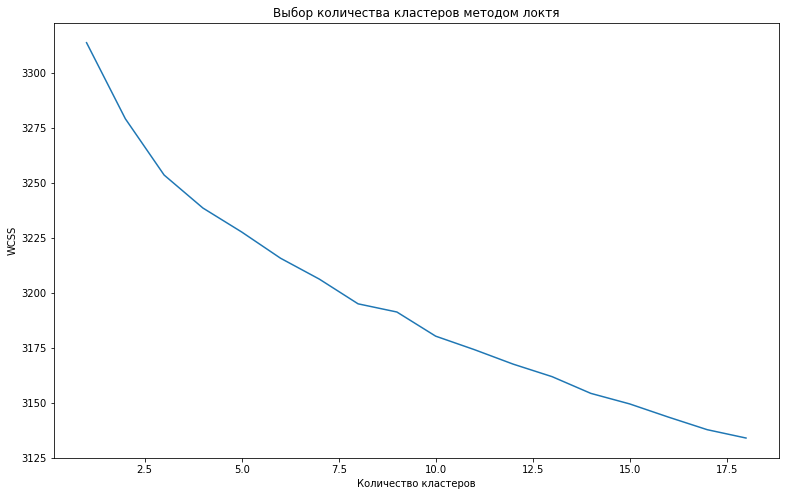

In [ ]:
# импортируем нужный класс
from sklearn.cluster import KMeans
 
# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []
 
# воспользуемся новой для нас функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 19
for i in range(1, 19):
    
    # настроим параметры модели (подробнее об этом расскажу чуть дальше)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(X_wcss)
 
    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)
 
# зададим размер график
plt.figure(figsize = (13,8))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 19), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
num_cluster=9


In [ ]:
km=KMeans(n_clusters=num_cluster)

In [ ]:
labels = km.fit_predict(matrix)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels[0:100]

array([3, 3, 2, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 6, 3, 2, 3, 3, 7,
       3, 3, 3, 7, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2,
       3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 6, 3, 3,
       6, 3, 3, 3, 3, 8, 3, 3, 6, 3, 3, 3, 3, 5, 3, 7, 1, 3, 3, 3, 3, 1,
       5, 3, 3, 3, 5, 6, 3, 3, 3, 1, 1, 5], dtype=int32)

In [ ]:
dif=pd.DataFrame()
dif["Labels"]=labels

In [ ]:
dif["Labels"].value_counts()

7    1325
8     376
3     354
2     338
1     235
6     218
0     212
5     192
4     130
Name: Labels, dtype: int64

<Axes: xlabel='Labels', ylabel='count'>

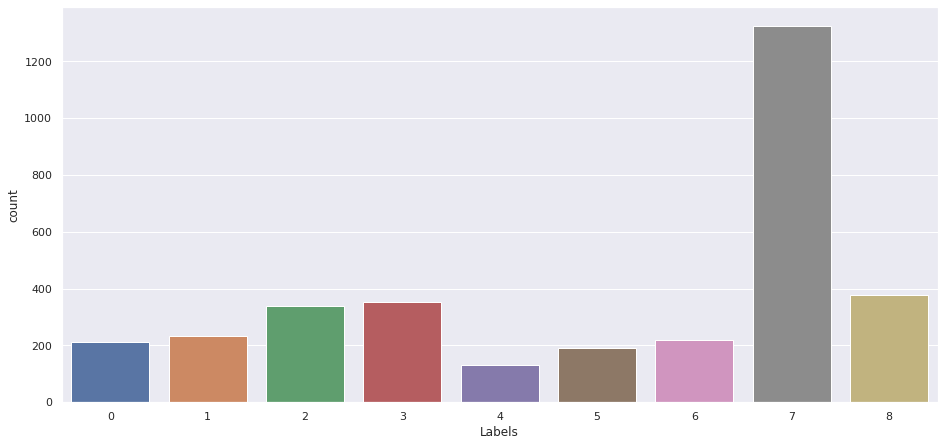

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,7.27)})
sns.countplot(data=dif, x="Labels")

<Axes: xlabel='Lable', ylabel='count'>

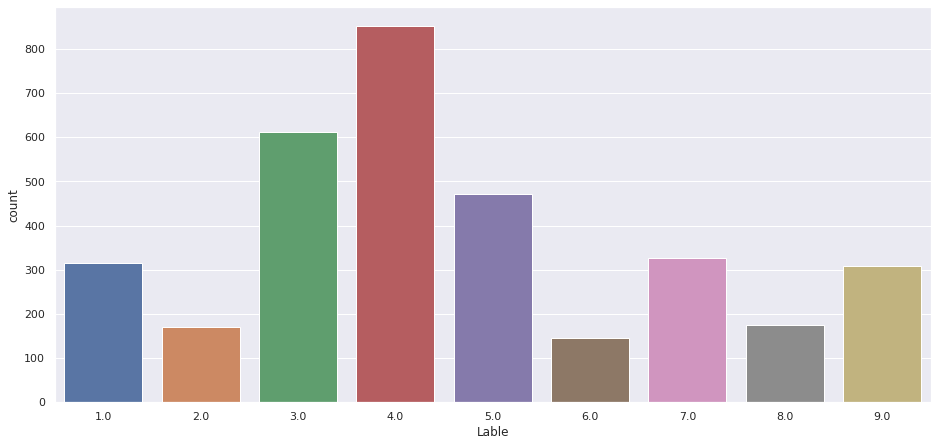

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,7.27)})
sns.countplot(data=df, x="Lable")

In [ ]:
dif["title"]=df["Title"]

In [ ]:
dif["orig_lable"]=df["Lable"]

In [ ]:
dif.head(7)

,Labels,title,orig_lable
0,3,"Авдеева В.Г., Балахонцев А.П., Федоткин О.В. ...",2.0
1,3,"Авдеева В.Г., Балахонцев А.П., Федоткин О.В. П...",2.0
2,2,"Авитисов П.В., Гасанов Ш.М.Н. Анализ возможнос...",2.0
3,1,"агапитов а.а., бойков а.а. силы и средства слу...",2.0
4,3,"Антонюк Г.В., Кирсанов А.И., Дворский А.Г., Зо...",2.0
5,3,"Астанкин С.В., Дворский А.Г., Золотарёва В.И.,...",2.0
6,3,"Багдасаров Г.Г., Волошко В.М. Участие окружных...",2.0


In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dif.to_excel (r'/content/StatesN.xlsx')

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
text_raw = " ".join(now_text)

In [ ]:
text_raw[:102]

'авдеев,в,г,балахонцев,а,п,федоткина,о,в,перспективный,направление,деятельность,территориальный,служба,'

In [ ]:
wordcloud = WordCloud(background_color = "white",
               max_words = 2000, max_font_size = 500,
               random_state = 42).generate(text_raw)

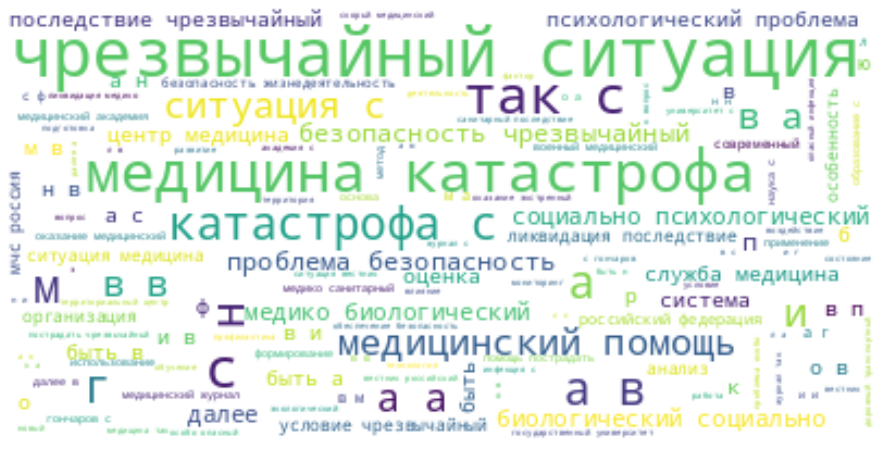

In [ ]:
plt.figure(figsize=(18,8))
# plot words
plt.imshow(wordcloud, interpolation="bilinear")
# remove axes
plt.axis("off")
# show the result
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
num_clusters = 99
num_seeds = 9
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', #6: '#4700f9', 7: '#f6f900', 8: '#00f91d',9: '#d9d9d9', 10: '#000000', 11: '#f07373', 12: '#dde4e1', 13: '#ff5073', 14: '#dd0404',
    15: '#cccccc', 16: '#aaaaaa', 17: '#f7f7f7', 18: '#9f9f9f'
}

In [ ]:
pca_num_components = 2
tsne_num_components = 2

In [ ]:
X=np.asarray(X)

In [ ]:
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)

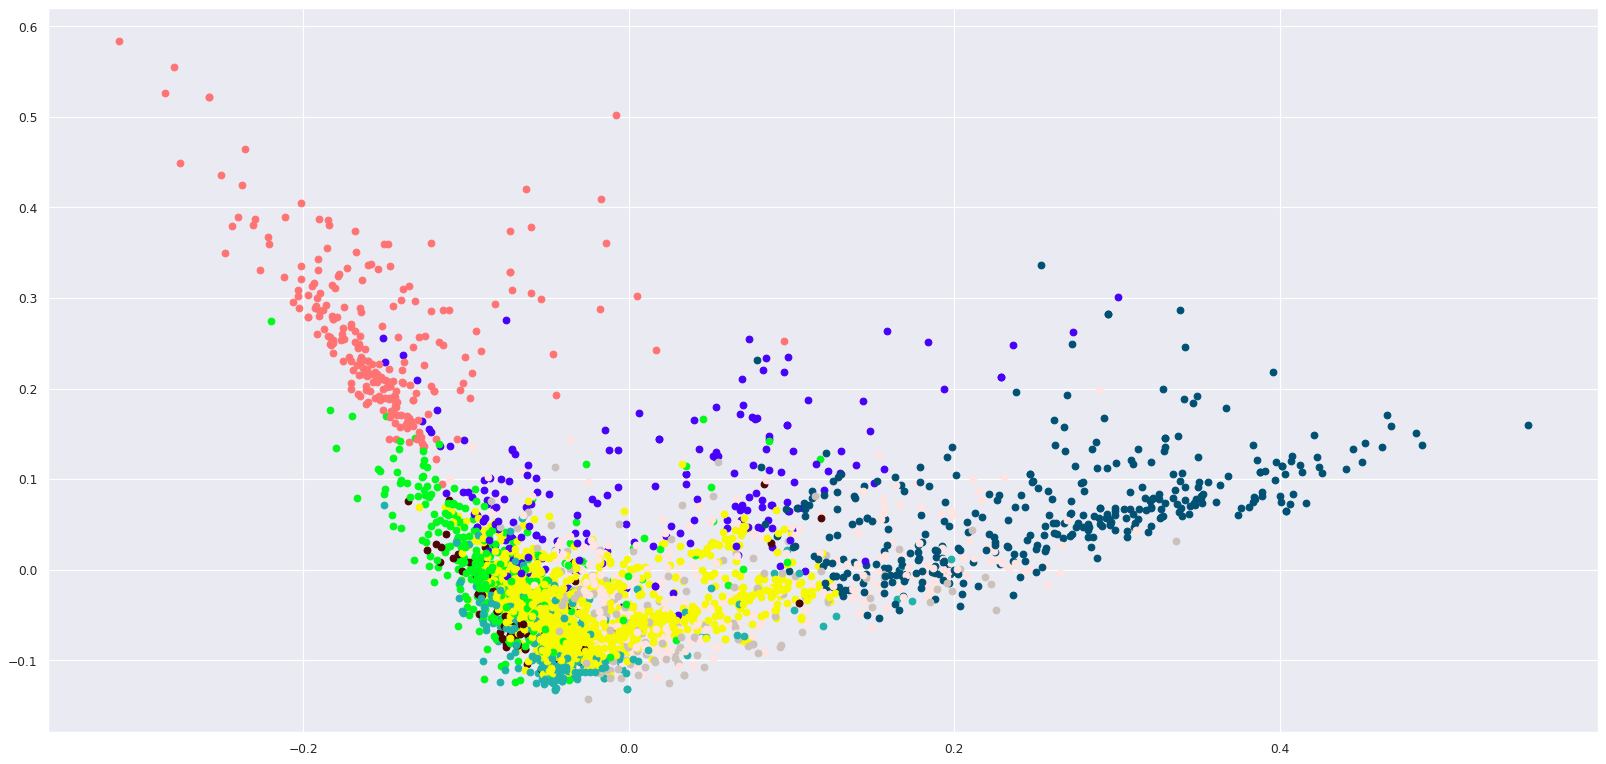

In [ ]:
# print reduced_data
plt.figure(figsize=(25, 12), dpi=80)
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    
    plt.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()